In [8]:
import pandas as pd
import numpy as np

summary_df = pd.read_csv("data/waveform_summary.csv")
summary_df.head()

,event_id,magnitude,snr1,snr2,snr3,waveform_file,gap1,gap2,gap3
0,20170504230420,1.5,0.789505,0.669106,6.062811,./data/waveforms/HH/20170504230420_ERIK_HH.mseed,0.0,0.0,0.0
1,20140314175500,2.3,5.010262,1.910753,5.753783,./data/waveforms/HH/20140314175500_CTKS_HH.mseed,0.0,0.0,0.0
2,20150925010033,1.6,1.261854,1.096219,1.218887,./data/waveforms/HH/20150925010033_GULT_HH.mseed,0.0,0.0,0.0
3,20150727195655,1.8,1.581244,1.658941,2.756307,./data/waveforms/HH/20150727195655_ENEZ_HH.mseed,0.0,0.0,0.0
4,20230318222022,2.1,155.485221,24.352586,197.718550,./data/waveforms/HH/20230318222022_YLV_HH.mseed,0.0,0.0,0.0


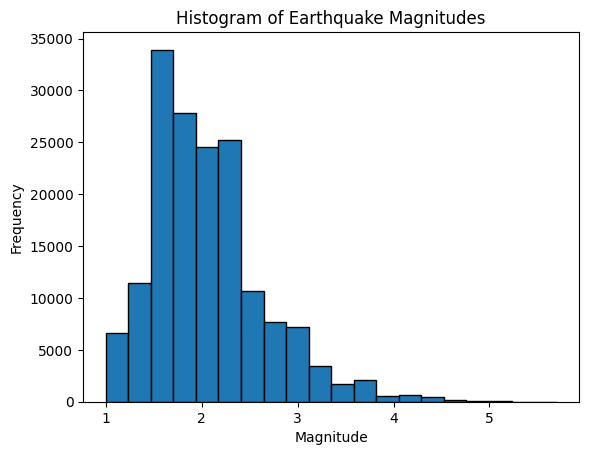

In [9]:
# create a histogram of magnitudes
import matplotlib.pyplot as plt

plt.hist(summary_df["magnitude"], bins=20, edgecolor='black')
plt.title("Histogram of Earthquake Magnitudes")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.show()

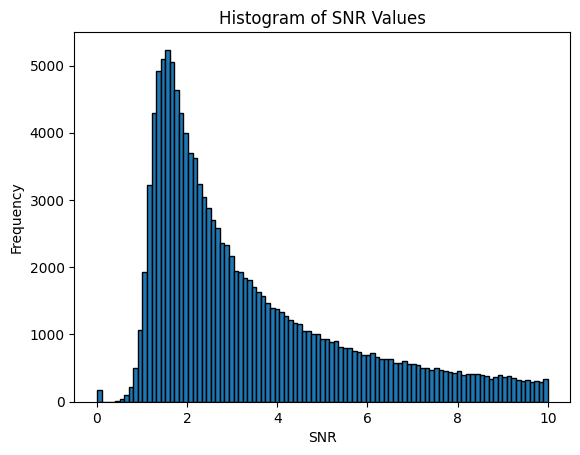

In [10]:
# for snr
# choose specific bins
# first, find the min snr column using the min of 3 columns snr1, snr2, snr3
# summary_df["snr_min"] = summary_df[["snr1", "snr2", "snr3"]].min(axis=1)
# summary_df["snr_mean"] = summary_df[["snr1", "snr2", "snr3"]].mean(axis=1)
summary_df["snr_max"] = summary_df[["snr1", "snr2", "snr3"]].max(axis=1)

plt.hist(summary_df["snr_max"].dropna(), bins=np.linspace(0, 10, 100), edgecolor='black')
plt.title("Histogram of SNR Values")
plt.xlabel("SNR")
plt.ylabel("Frequency")
plt.show()

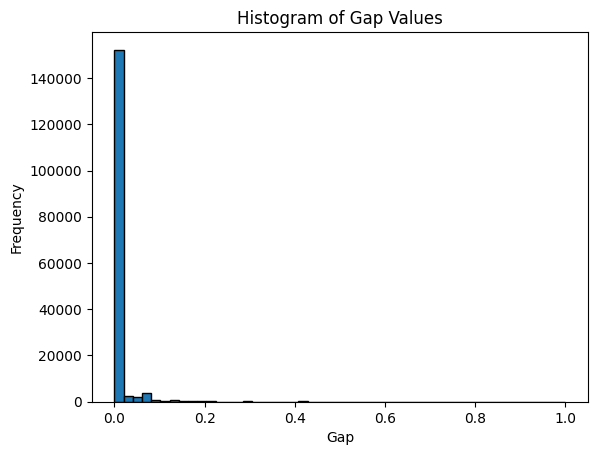

In [11]:
summary_df["gap_max"] = summary_df[["gap1", "gap2", "gap3"]].max(axis=1)

plt.hist(summary_df["gap_max"].dropna(), bins=np.linspace(0, 1, 50), edgecolor='black')
plt.title("Histogram of Gap Values")
plt.xlabel("Gap")
plt.ylabel("Frequency")
plt.show()

In [12]:
# low_snr_ratio = (summary_df["snr_max"] < 2).sum() / len(summary_df)
# print(f"Ratio of waveforms with SNR < 2: {low_snr_ratio:.2%}")

# find the number of rows where snr_max > 1.5 and gap_max = 0
high_snr_low_gap = summary_df[(summary_df["snr_max"] > 1.5) & (summary_df["gap_max"] == 0)]
ratio_high_snr_low_gap = len(high_snr_low_gap) / len(summary_df)
print(f"Ratio of waveforms with SNR > 1.5 and Gap = 0: {ratio_high_snr_low_gap:.2%}")

Ratio of waveforms with SNR > 1.5 and Gap = 0: 78.73%


In [13]:
# save the high_snr_low_gap
high_snr_low_gap.to_csv("data/high_snr_low_gap_waveforms.csv", index=False)

Waveform File: ./data/waveforms/HH/20170711021831_YLV_HH.mseed, SNR: 16.905042478932128


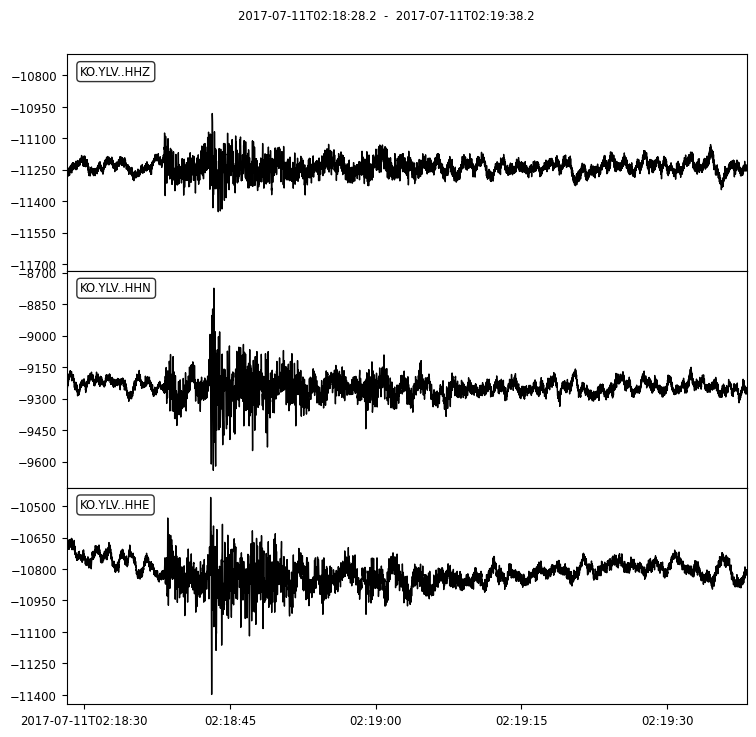

Waveform File: ./data/waveforms/HH/20240306230605_GAZK_HH.mseed, SNR: 4.4804460017934895


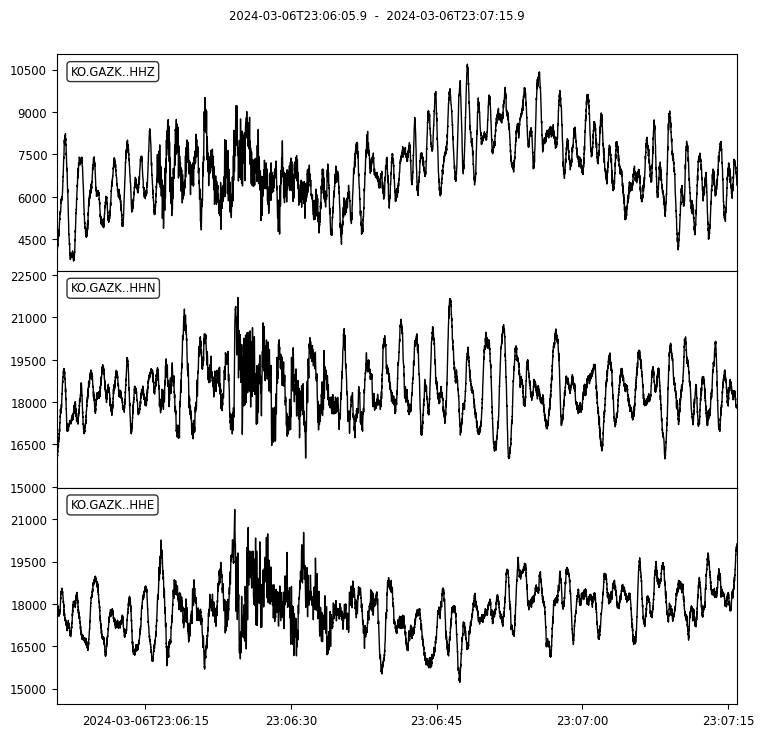

Waveform File: ./data/waveforms/HH/20150909235545_GADA_HH.mseed, SNR: 65.954829159801


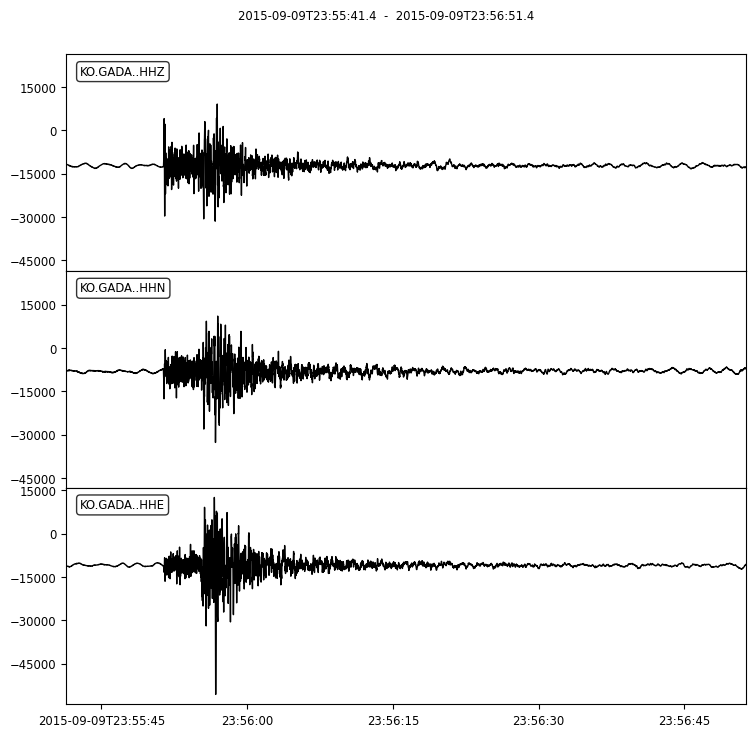

Waveform File: ./data/waveforms/HH/20150614193508_ADVT_HH.mseed, SNR: 3.926243925853598


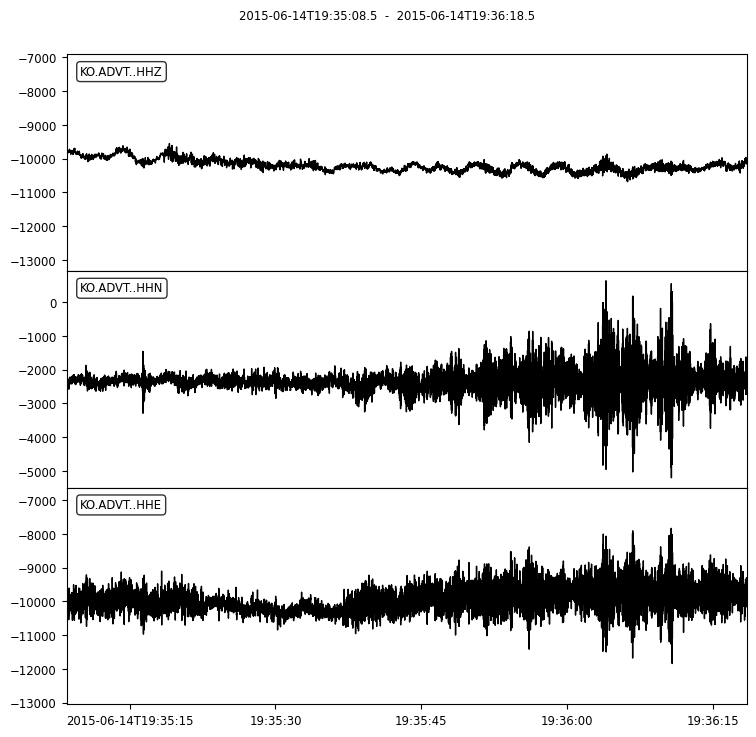

Waveform File: ./data/waveforms/HN/20190526162345_CANM_HN.mseed, SNR: 11.733661432893522


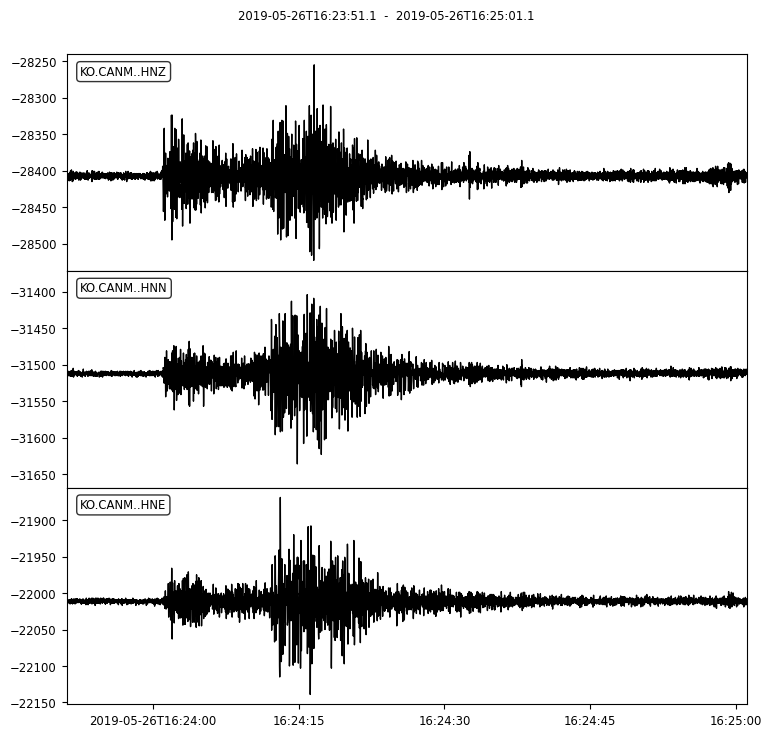

Waveform File: ./data/waveforms/HH/20241121005309_MDNY_HH.mseed, SNR: 7.631392250789095


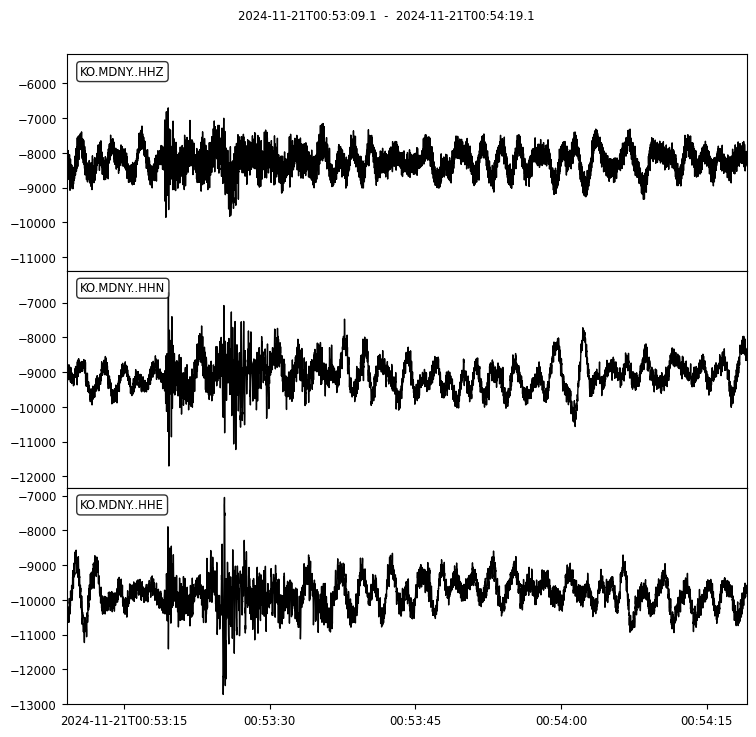

Waveform File: ./data/waveforms/HN/20220606021913_KRBG_HN.mseed, SNR: 1.2364953340996447


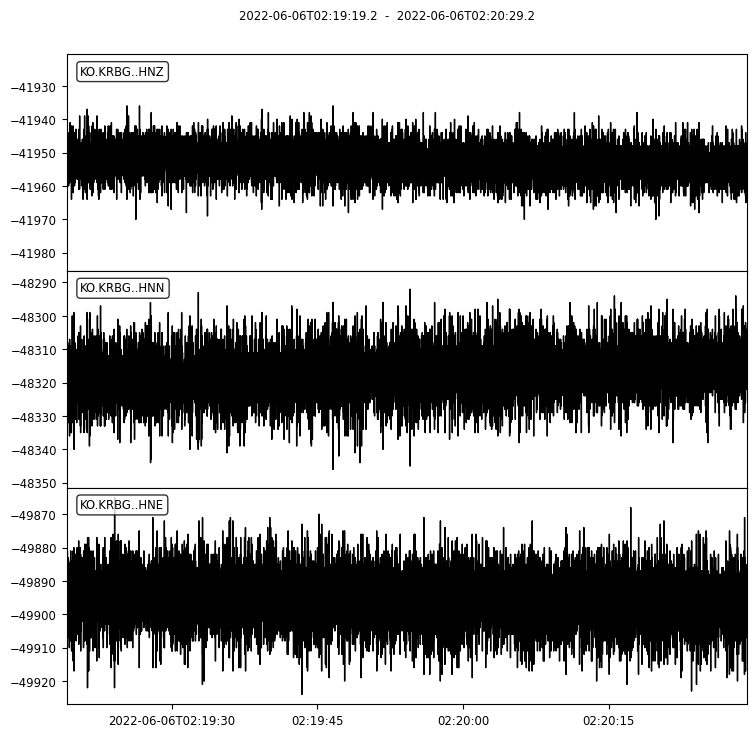

Waveform File: ./data/waveforms/HH/20170801200133_ARMT_HH.mseed, SNR: 2.1418395880863725


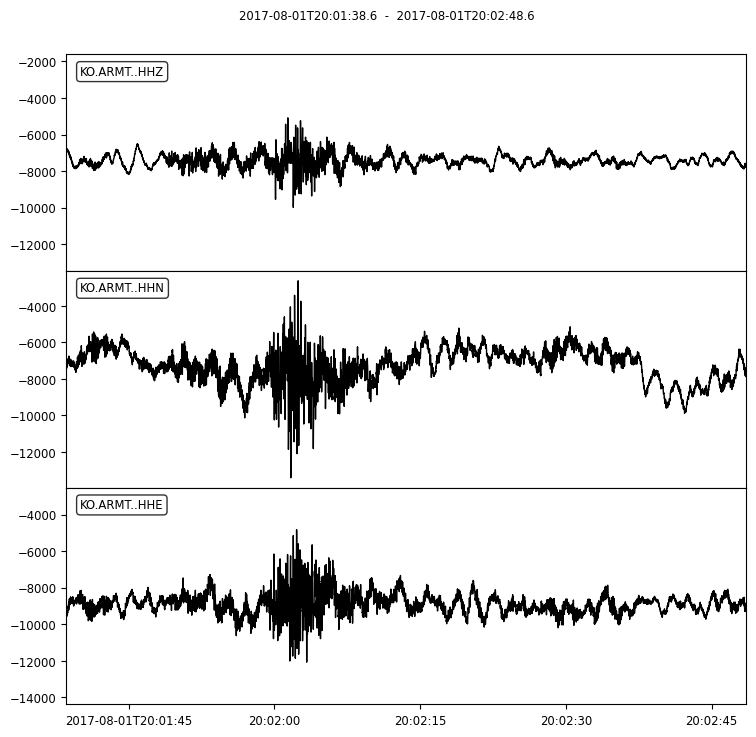

Waveform File: ./data/waveforms/HH/20180817100240_ISK_HH.mseed, SNR: 1.9130009666675185


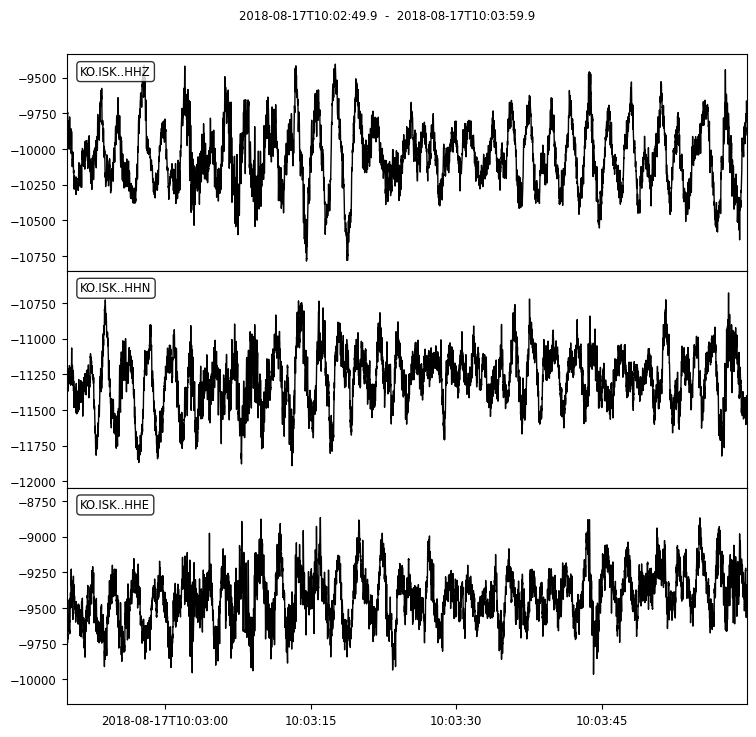

Waveform File: ./data/waveforms/HN/20220220205048_EDC_HN.mseed, SNR: 3.6769271848824863


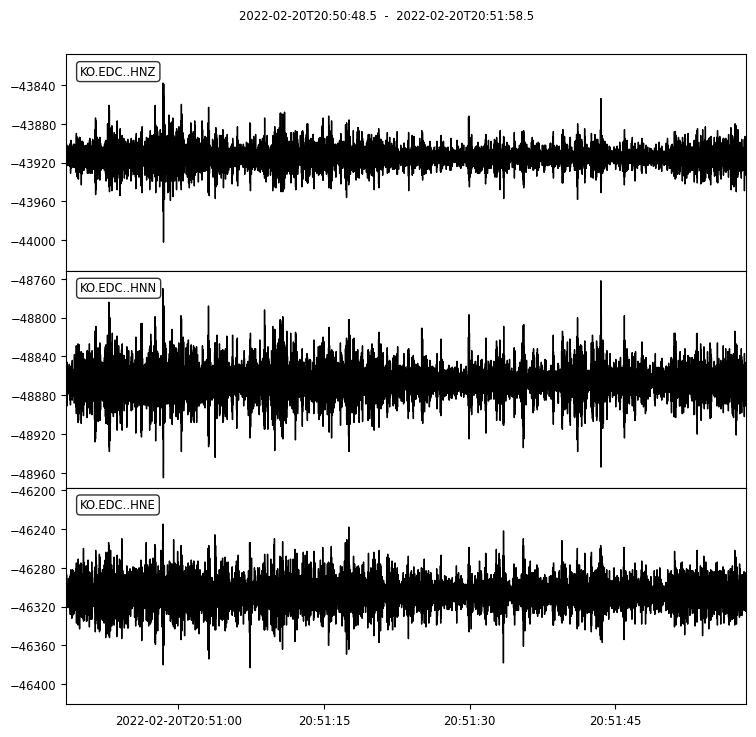

In [14]:
import obspy
# Show 10 random samples of waveforms and print the snrs
sampled_df = summary_df.sample(10)
for index, row in sampled_df.iterrows():
    print(f"Waveform File: {row['waveform_file']}, SNR: {row['snr_max']}")
    st = obspy.read(row['waveform_file'])
    st.plot()
    # plt.title(f"Waveform: {row['waveform_file']}, SNR: {row['snr']}")
    # plt.show()
